# TP PGM VINCENT Yann TANG Kevin

# Exo 8 TD

## Init

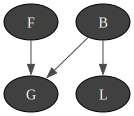

In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

gum.config.reset()

# Créer le réseau bayésien
bn = gum.fastBN("G<-B->L;G<-F")

# Définir les probabilités conditionnelles
bn.cpt("L")[{'B': 1}] = [0.2, 0.8] # P(L=1|B=1)=0.8,
bn.cpt("L")[{'B': 0}] = [1, 0.0] # P(L=1|B=0)=0.0

# Définir les probabilités conditionnelles pour la variable G
bn.cpt("G")[{'B': 0, 'F': 0}] = [0.9, 0.1]  # P(G=1|B=0, F=0), P(G=0|B=0, F=0)
bn.cpt("G")[{'B': 0, 'F': 1}] = [0.8, 0.2]  # P(G=1|B=0, F=1), P(G=0|B=0, F=1)
bn.cpt("G")[{'B': 1, 'F': 0}] = [0.8, 0.2]  # P(G=1|B=1, F=0), P(G=0|B=1, F=0)
bn.cpt("G")[{'B': 1, 'F': 1}] = [0.2, 0.8]  # P(G=1|B=1, F=1), P(G=0|B=1, F=1)


# Définir les probabilités pour B et F
bn.cpt("B")[:] = [0.1, 0.9]  # P(B=1)
bn.cpt("F")[:] = [0.1, 0.9]  # P(F=1)

# Afficher le réseau bayésien
gnb.showBN(bn)

## Q1

In [ ]:
# Calculer P(L=0)
ie = gum.LazyPropagation(bn)
ie.makeInference()
p_L_0 = ie.posterior("L")[0]
print("P(L=0):", p_L_0)

P(L=0): 0.28


## Q2

In [ ]:
# Vérifier l'indépendance de L et F
independent_L_F = bn.isIndependent("L", "F")
print("L and F independent?", independent_L_F)

L and F independent? True


## Q3

In [ ]:
# Calculer P(F=1|G=0, L=1) et P(F=1|G=0)
ie = gum.LazyPropagation(bn)
ie.setEvidence({"G": 0, "L": 1})
ie.makeInference()
p_F_1_given_G_0_L_1 = ie.posterior("F")[1]
ie.setEvidence({"G": 0})
ie.makeInference()
p_F_1_given_G_0 = ie.posterior("F")[1]

print("P(F=1|G=0, L=1):", p_F_1_given_G_0_L_1)
print("P(F=1|G=0):", p_F_1_given_G_0)

P(F=1|G=0, L=1): 0.6923076923076923
P(F=1|G=0): 0.7428571428571428


## Q4

In [ ]:
from itertools import combinations

def test_all_independencies(bn, variables):
    for i in range(len(variables)):
        for j in range(i+1, len(variables)):
            # Test for unconditional independence
            if bn.isIndependent(variables[i], variables[j], []):
                print(f"{variables[i]} et {variables[j]} sont inconditionnellement indépendant.")
            else:
                print(f"{variables[i]} et {variables[j]} ne sont pas inconditionnellement indépendant.")

            # Test for conditional independence given other variables
            for k in range(1, len(variables)):
                for condition in combinations(variables, k):
                    # Skip conditions where the variable itself is included in the condition
                    if variables[i] in condition or variables[j] in condition:
                        continue
                    if bn.isIndependent(variables[i], variables[j], condition):
                        print(f"{variables[i]} et {variables[j]} sont conditionnellement indépendant sachant {condition}.")
                    else:
                        print(f"{variables[i]} et {variables[j]} ne sont pas conditionnellement indépendant sachant {condition}.")

# Example usage:
# Assuming 'bn' is your Bayesian network object and 'variables' is a list of its variables
variables = ["L", "B", "F", "G"]
test_all_independencies(bn, variables)

L et B ne sont pas inconditionnellement indépendant.
L et B ne sont pas conditionnellement indépendant sachant ('F',).
L et B ne sont pas conditionnellement indépendant sachant ('G',).
L et B ne sont pas conditionnellement indépendant sachant ('F', 'G').
L et F sont inconditionnellement indépendant.
L et F sont conditionnellement indépendant sachant ('B',).
L et F ne sont pas conditionnellement indépendant sachant ('G',).
L et F sont conditionnellement indépendant sachant ('B', 'G').
L et G ne sont pas inconditionnellement indépendant.
L et G sont conditionnellement indépendant sachant ('B',).
L et G ne sont pas conditionnellement indépendant sachant ('F',).
L et G sont conditionnellement indépendant sachant ('B', 'F').
B et F sont inconditionnellement indépendant.
B et F sont conditionnellement indépendant sachant ('L',).
B et F ne sont pas conditionnellement indépendant sachant ('G',).
B et F ne sont pas conditionnellement indépendant sachant ('L', 'G').
B et G ne sont pas inconditio

## Q5

In [ ]:
# Taux de compression



# Exo 6 TD

In [ ]:
import numpy as np

class HiddenMarkovModel:
    def __init__(self, states, initial_prob, transition_prob, emission_prob):
        self.states = states
        self.initial_prob = initial_prob
        self.transition_prob = transition_prob
        self.emission_prob = emission_prob

    def forward_algorithm(self, observations):
        num_states = len(self.states)
        num_observations = len(observations)

        # Initialize forward probabilities
        forward_prob = np.zeros((num_states, num_observations))

        # Initialize base case
        for i in range(num_states):
            forward_prob[i, 0] = self.initial_prob[i] * self.emission_prob[i][observations[0]]

        # Forward algorithm
        for t in range(1, num_observations):
            for j in range(num_states):
                forward_prob[j, t] = sum(forward_prob[i, t - 1] * self.transition_prob[i][j] * self.emission_prob[j][observations[t]] for i in range(num_states))

        # Probability of the sequence
        prob_sequence = sum(forward_prob[i, num_observations - 1] for i in range(num_states))

        return prob_sequence

# Exemple d'utilisation avec des symboles différents
states = ["S1", "S2", "S3"]
symbols = ["a", "b"]
initial_prob = [0.6, 0.4, 0.0]
transition_prob = np.array([[0.3, 0.5, 0.2], [0.0, 0.3, 0.7], [0.0, 0.0, 1.0]])
emission_prob = np.array([[1.0, 0.5, 0.0], [0, 0.5, 1.0], [0,0,0]])

hmm = HiddenMarkovModel(states, initial_prob, transition_prob, emission_prob)

# Calcul de la probabilité de la séquence d'observations "aab"
sequence = ["a", "a", "b"]
observations = [symbols.index(symbol) for symbol in sequence]
likelihood = hmm.forward_algorithm(observations)

print(f"La probabilité de la séquence {sequence} est : {likelihood:.5f}")


# Exo 2 CC2

## Init

In [ ]:
bnCC = gum.fastBN('sante<-salaire->bio->sante')
# Définir les probabilités conditionnelles
bnCC.cpt("bio")[{'salaire': 1}] = [0.4, 0.6] # P(bio=1|salaire=1)=0.6,
bnCC.cpt("bio")[{'salaire': 0}] = [0.6, 0.4] # P(bio=1|salaire=0)=0.4

# Définir les probabilités conditionnelles pour la variable sante
bnCC.cpt("sante")[{'bio': 0, 'salaire': 0}] = [0.5, 0.5] # P(sante=1|bio=0, salaire=0) = 0.5
bnCC.cpt("sante")[{'bio': 1, 'salaire': 0}] = [0.3, 0.7] # P(sante=1|bio=1, salaire=0) = 0.7
bnCC.cpt("sante")[{'bio': 0, 'salaire': 1}] = [0.4, 0.6] # P(sante=1|bio=0, salaire=1) = 0.6
bnCC.cpt("sante")[{'bio': 1, 'salaire': 1}] = [0.2, 0.8] # P(sante=1|bio=1, salaire=1) = 0.8

# Définir les probabilités pour salaire
bnCC.cpt("salaire")[:] = [0.7,0.3]  # P(salaire=1)=0.3

gnb.flow.row(bnCC,bnCC.cpt("salaire"),bnCC.cpt("bio"),bnCC.cpt("sante"))


## Solution

In [ ]:
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb

modeleCC=csl.CausalModel(bnCC)



cslnb.showCausalImpact(modeleCC,"sante", doing="bio", values={"bio":1})